In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import MixtureDistribution, mv_mixture_rvs
from statsmodels.kernel_methods import bandwidths, fast_linbin, kde_1d, kde_utils

## Multivariate, with unbounded dimensions

In [2]:
import statsmodels.sandbox.distributions.mv_normal as mvd
cov1 = np.diag([1,.2])
cov2 = np.diag([.5,1.1])
mu1 = np.array([2, -2.5])
mu2 = np.array([-2, 1])
mvn1 = mvd.MVNormal(mu1, cov1)
mvn2 = mvd.MVNormal(mu2, cov2)

In [3]:
rvs = mv_mixture_rvs([.6, .4], 1000, [mvn1, mvn2], 2)

def dist_pdf(x):
    return 0.6*mvn1.pdf(x) + 0.4*mvn2.pdf(x)

rvs.shape

(1000, 2)

In [4]:
bounds = [[-5,6],[-5,6]]

In [5]:
grid, values = fast_linbin.fast_bin_nd(rvs, bounds, 128)
values /= grid.start_volume * rvs.shape[0]
grid

<Grid 128Bx128B, [-5 - 6 ; -5 - 6], dtype=float64>

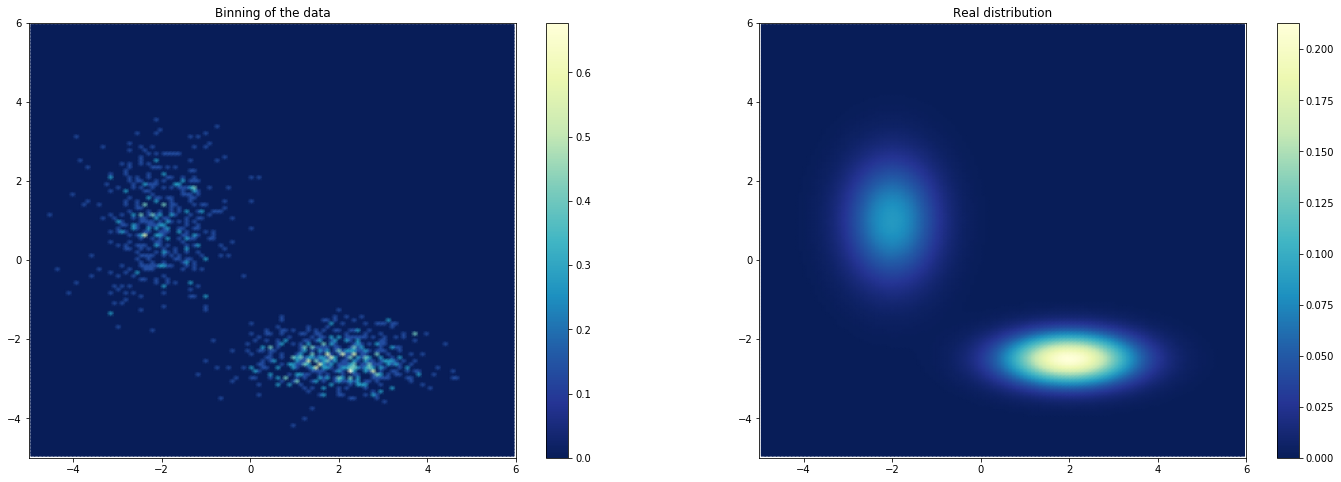

In [6]:
fig = plt.figure(figsize=(24, 8))
m2 = grid.full('C')
ax = fig.add_subplot(1,2,1)
m = ax.pcolormesh(m2[0], m2[1], values, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Binning of the data')
plt.colorbar(ax=ax, mappable=m)

ax = fig.add_subplot(1,2,2)
real_pdf = dist_pdf(grid.linear()).reshape(grid.shape)
m = ax.pcolormesh(m2[0], m2[1], real_pdf, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Real distribution')
plt.colorbar(ax=ax, mappable=m)

In [7]:
kde = sm.kernel_methods.KDE(rvs)
mod = kde.fit()
xs, ys = mod.grid()
mod.bandwidth

array([0.57157196, 0.49993803])

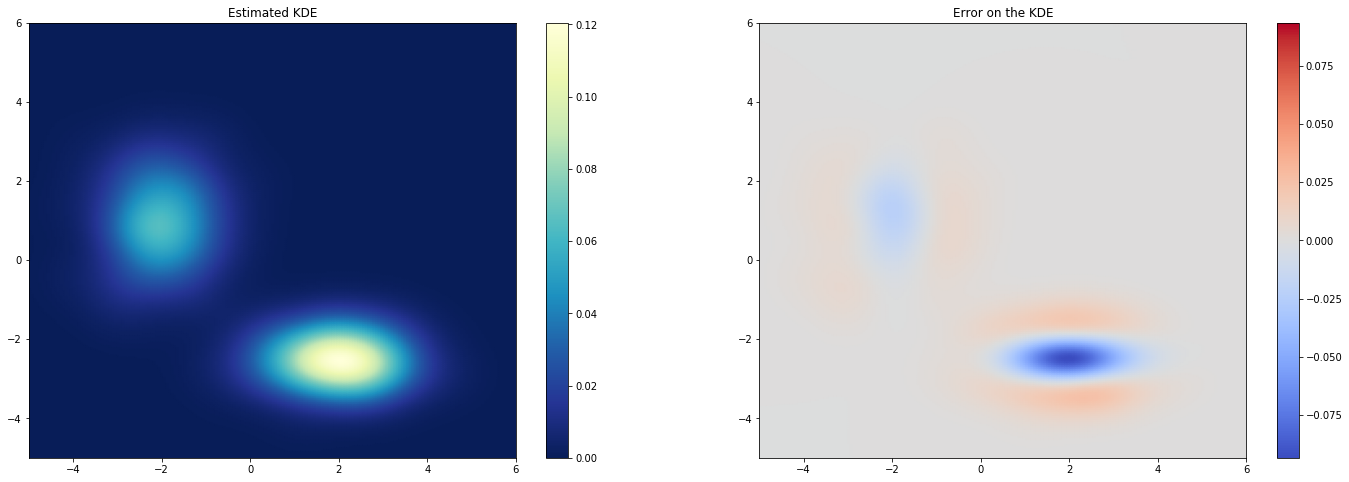

In [8]:
fig = plt.figure(figsize=(24, 8))
m2 = xs.full('C')
ax = fig.add_subplot(1,2,1)
m = ax.pcolormesh(m2[0], m2[1], ys, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Estimated KDE')
plt.colorbar(ax=ax, mappable=m)

ax = fig.add_subplot(1,2,2)
real_pdf = dist_pdf(xs.linear()).reshape(xs.shape)
m = ax.pcolormesh(m2[0], m2[1], (ys-real_pdf), cmap=plt.cm.coolwarm, shading='gouraud')
cmin, cmax = m.get_clim()
crange = max(abs(cmin), abs(cmax))
m.set_clim(-crange, crange)
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Error on the KDE')
plt.colorbar(ax=ax, mappable=m)

In [11]:
mod.pdf([[-2, 1]])

array([0.06457114])

In [12]:
xs3 = kde_utils.Grid([np.r_[-4:4:64j], np.r_[-4:4:64j]])
xxs3 = xs3.full().reshape((np.prod(xs3.shape),2))

In [14]:
ys3 = mod.pdf(xxs3)

In [15]:
ys3.shape = xs3.shape

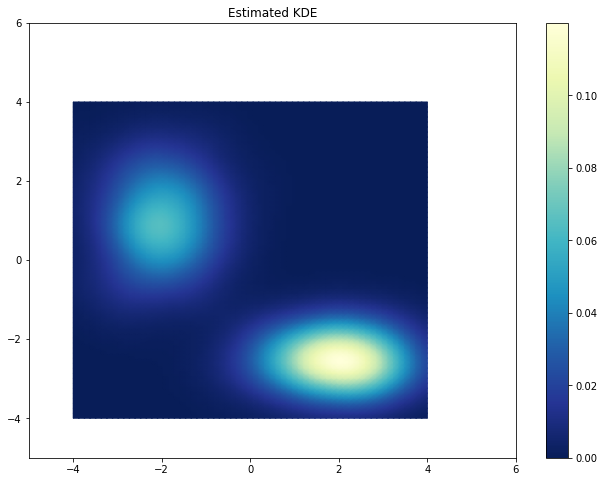

In [16]:
fig = plt.figure(figsize=(24, 8))
m3 = xs3.full('C')
ax = fig.add_subplot(1,2,1)
m = ax.pcolormesh(m3[0], m3[1], ys3, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Estimated KDE')
plt.colorbar(ax=ax, mappable=m)


## Multivariate, with one reflective, one cyclic dimension

In [63]:
import statsmodels.sandbox.distributions.mv_normal as mvd
cov1 = np.diag([.3,.2])
cov2 = np.diag([.5,0.6])
mu1 = np.array([0.3, 1.5])
mu2 = np.array([3, 2.5])
mvn1 = mvd.MVNormal(mu1, cov1)
mvn2 = mvd.MVNormal(mu2, cov2)

In [64]:
rvs = mv_mixture_rvs([.4, .6], 10000, [mvn1, mvn2], 2)
rvs[:,0] = abs(rvs[:,0])
rvs[:,1] = rvs[:,1] % 3

def dist_pdf_(x):
    return 0.4*mvn1.pdf(x) + 0.6*mvn2.pdf(x)

def dist_pdf(x):
    ref_x = np.c_[-x[:,0], x[:,1]]
    cyc_x = np.c_[np.zeros(len(x)), 3*np.ones(len(x))]
    return dist_pdf_(x) + dist_pdf_(ref_x) + dist_pdf_(x + cyc_x) + dist_pdf_(x - cyc_x)

rvs.shape

(10000, 2)

In [65]:
bounds = [[0,5],[0,3]]

In [66]:
grid, values = fast_linbin.fast_bin_nd(rvs, bounds, 128)
values /= grid.start_volume * rvs.shape[0]
grid

<Grid 128Bx128B, [0 - 5 ; 0 - 3], dtype=float64>

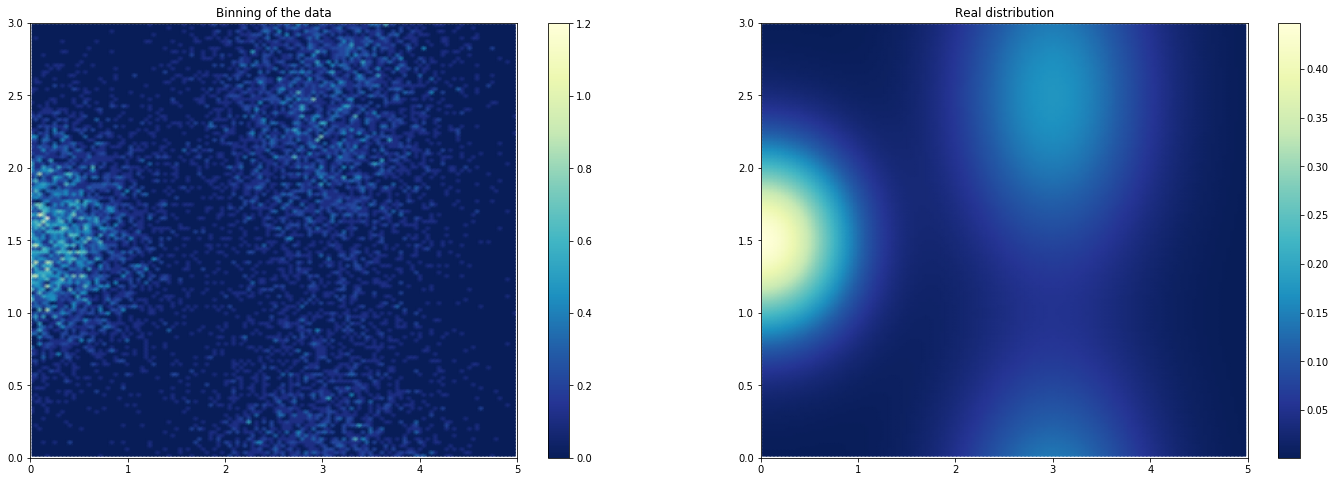

In [67]:
fig = plt.figure(figsize=(24, 8))
m2 = grid.full('C')
ax = fig.add_subplot(1,2,1)
m = ax.pcolormesh(m2[0], m2[1], values, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Binning of the data')
plt.colorbar(ax=ax, mappable=m)

ax = fig.add_subplot(1,2,2)
real_pdf = dist_pdf(grid.linear()).reshape(grid.shape)
m = ax.pcolormesh(m2[0], m2[1], real_pdf, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Real distribution')
plt.colorbar(ax=ax, mappable=m)

In [72]:
k = sm.kernel_methods.KDE(rvs)

In [74]:
k.lower = [0, 0]
k.upper = [np.inf, 3]
k.method.methods[0] = kde_1d.Reflection1D()
k.method.methods[1] = kde_1d.Cyclic1D()

In [77]:
est = k.fit()
xs, ys = est.grid()
est.bandwidth

array([0.22850676, 0.12811103])

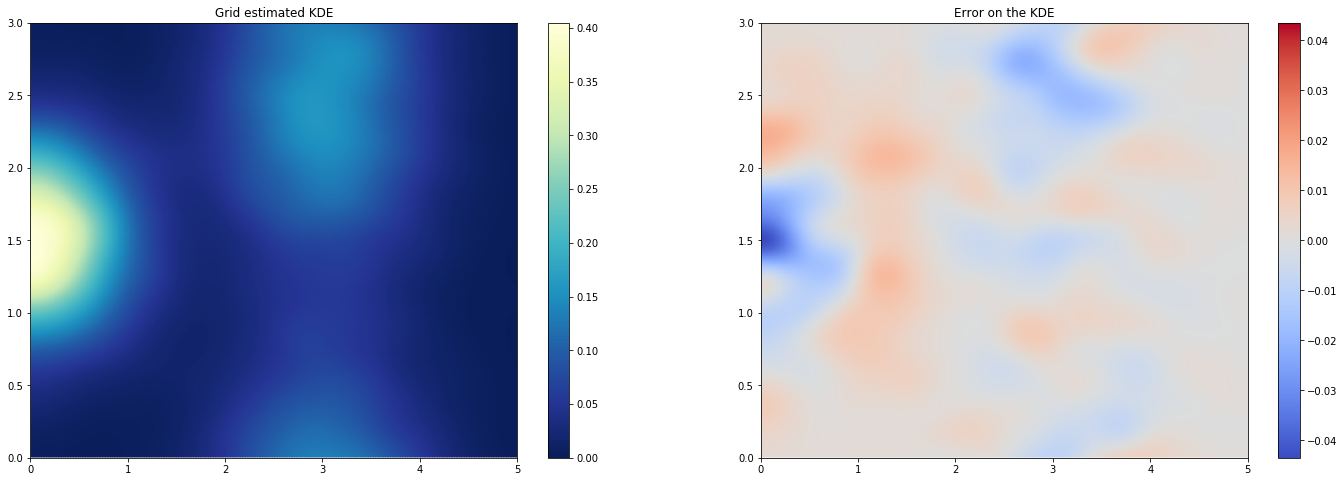

In [85]:
fig = plt.figure(figsize=(24, 8))
m2 = xs.full('C')
ax = fig.add_subplot(1,2,1)
m = ax.pcolormesh(m2[0], m2[1], ys, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Grid estimated KDE')
plt.colorbar(ax=ax, mappable=m)

ax = fig.add_subplot(1,2,2)
real_pdf = dist_pdf(xs.linear()).reshape(xs.shape)
m = ax.pcolormesh(m2[0], m2[1], (ys-real_pdf), cmap=plt.cm.coolwarm, shading='gouraud')
cmin, cmax = m.get_clim()
crange = max(abs(cmin), abs(cmax))
m.set_clim(-crange, crange)
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Error on the KDE')
plt.colorbar(ax=ax, mappable=m)

In [80]:
xs3 = kde_utils.Grid([np.r_[0:5:64j], np.r_[0:3:64j]])
xxs3 = xs3.full().reshape((np.prod(xs3.shape),2))

In [81]:
ys3 = est.pdf(xxs3)

In [82]:
ys3.shape = xs3.shape

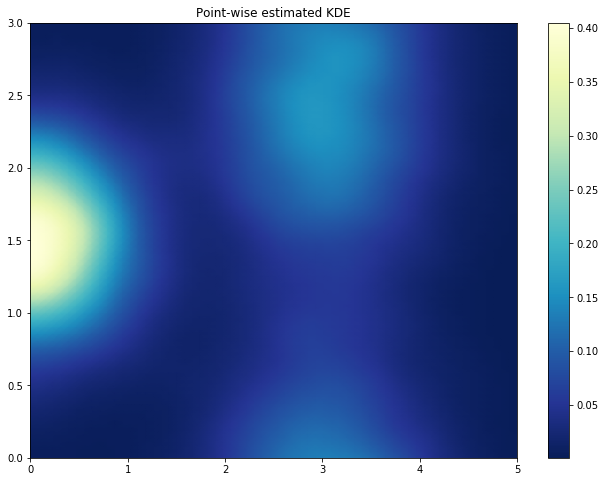

In [84]:
fig = plt.figure(figsize=(24, 8))
m3 = xs3.full('C')
ax = fig.add_subplot(1,2,1)
m = ax.pcolormesh(m3[0], m3[1], ys3, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Point-wise estimated KDE')
plt.colorbar(ax=ax, mappable=m)

## Multivariate, with one bounded, one log-transform variable

In [2]:
import statsmodels.sandbox.distributions.mv_normal as mvd

cov1 = np.diag([.3,.2])
cov2 = np.diag([.5,1])
mu1 = np.array([0.3, -1])
mu2 = np.array([3, -2.5])
mvn1 = mvd.MVNormal(mu1, cov1)
mvn2 = mvd.MVNormal(mu2, cov2)

In [3]:
rvs = mv_mixture_rvs([.7, .3], 15000, [mvn1, mvn2], 2)
rvs = rvs[rvs[:,0]>=0,:]
rvs[:,1] = np.exp(rvs[:,1])

def pdf_base_(x):
    return 0.7*mvn1.pdf(x) + 0.3*mvn2.pdf(x)

cropped = 0.7*mvn1.cdf(0) + 0.3*mvn2.cdf(0)

def dist_pdf(x):
    real_x = np.c_[x[:,0], np.log(x[:,1])]
    ys = pdf_base_(real_x)
    out = np.empty_like(ys)
    kde_1d.transform_distribution(real_x[:,1], ys, kde_1d.LogTransform.Dinv, out)
    return out / (1-cropped)

rvs.shape

(11960, 2)

In [4]:
bounds = [[0, 5], [0, 1.2]]

In [5]:
grid, values = fast_linbin.fast_bin_nd(rvs, bounds, 128)
values /= grid.start_volume * rvs.shape[0]
grid

<Grid 128Bx128B, [0 - 5 ; 0 - 1.2], dtype=float64>

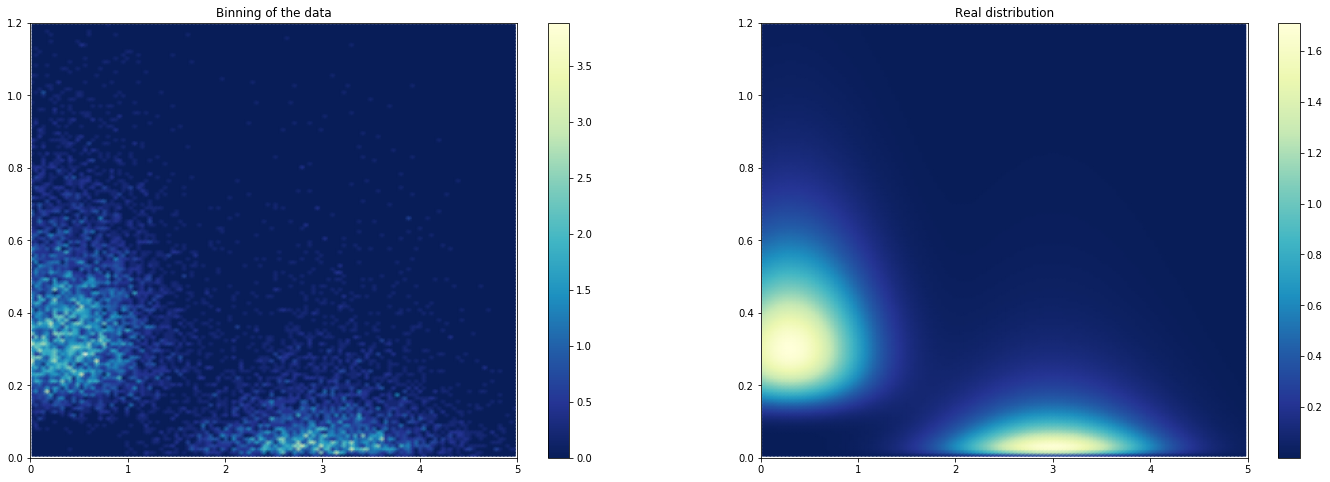

In [6]:
fig = plt.figure(figsize=(24, 8))
m2 = grid.full('C')
ax = fig.add_subplot(1,2,1)
m = ax.pcolormesh(m2[0], m2[1], values, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Binning of the data')
plt.colorbar(ax=ax, mappable=m)

ax = fig.add_subplot(1,2,2)
real_pdf = dist_pdf(grid.linear()).reshape(grid.shape)
m = ax.pcolormesh(m2[0], m2[1], real_pdf, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Real distribution')
plt.colorbar(ax=ax, mappable=m)

In [7]:
grid.shape, real_pdf.shape

((128, 128), (128, 128))

In [8]:
grid.integrate(real_pdf)

0.9920319764166237

In [9]:
k = sm.kernel_methods.KDE(rvs)

In [10]:
k.method.methods[0] = kde_1d.Renormalization()
k.method.methods[1] = kde_1d.Transform1D(kde_1d.LogTransform)

In [11]:
k.lower = [0, 0]

In [12]:
est = k.fit()
xs, ys = est.grid(N=512)
est.bandwidth

/home/barbier/prog/projects/statsmodels/statsmodels/kernel_methods/kde_1d.py:2380: RuntimeWarning: divide by zero encountered in log
  trans_kde.lower = self.trans(kde.lower)
/home/barbier/prog/projects/statsmodels/statsmodels/kernel_methods/kde_1d.py:2804: RuntimeWarning: divide by zero encountered in log
  return self.trans(values)


array([0.20854633, 0.03690591])

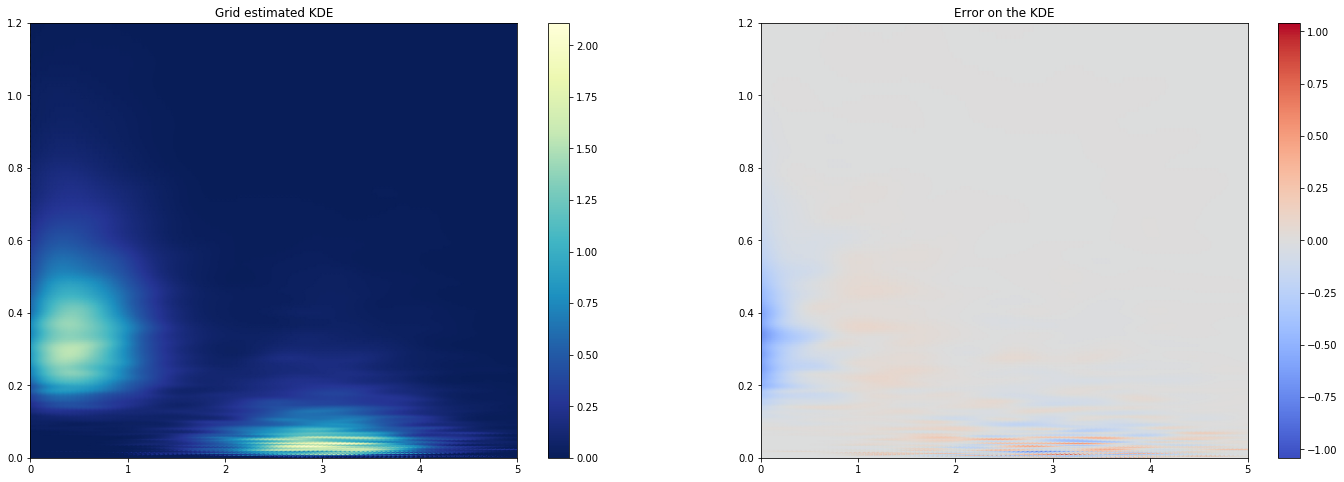

In [13]:
fig = plt.figure(figsize=(24, 8))
m2 = xs.full('C')
ax = fig.add_subplot(1,2,1)
m = ax.pcolormesh(m2[0], m2[1], ys, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Grid estimated KDE')
plt.colorbar(ax=ax, mappable=m)

ax = fig.add_subplot(1,2,2)
real_pdf = dist_pdf(xs.linear()).reshape(xs.shape)
m = ax.pcolormesh(m2[0], m2[1], (ys-real_pdf), cmap=plt.cm.coolwarm, shading='gouraud')
cmin, cmax = m.get_clim()
crange = max(abs(cmin), abs(cmax))
m.set_clim(-crange, crange)
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Error on the KDE')
plt.colorbar(ax=ax, mappable=m)

In [14]:
k.bandwidth = bandwidths.CrossValidation(bandwidths.CVIMSE, use_grid=True, folding=10)
est2 = k.fit()

In [15]:
xs, ys = est2.grid(N=512)
est2.bandwidth

array([0.04415143, 0.21095215])

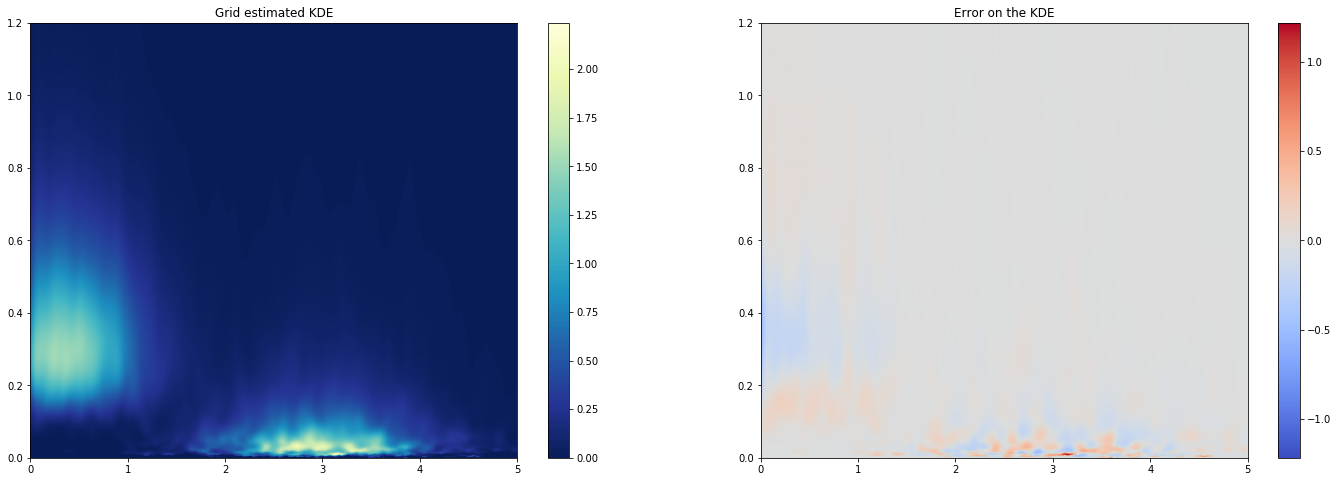

In [16]:
fig = plt.figure(figsize=(24, 8))
m2 = xs.full('C')
ax = fig.add_subplot(1,2,1)
m = ax.pcolormesh(m2[0], m2[1], ys, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Grid estimated KDE')
plt.colorbar(ax=ax, mappable=m)

ax = fig.add_subplot(1,2,2)
real_pdf = dist_pdf(xs.linear()).reshape(xs.shape)
m = ax.pcolormesh(m2[0], m2[1], (ys-real_pdf), cmap=plt.cm.coolwarm, shading='gouraud')
cmin, cmax = m.get_clim()
crange = max(abs(cmin), abs(cmax))
m.set_clim(-crange, crange)
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Error on the KDE')
plt.colorbar(ax=ax, mappable=m)

In [17]:
xs3 = kde_utils.Grid([np.r_[0:5:64j], np.r_[0:1.2:64j]])
xxs3 = xs3.full().reshape((np.prod(xs3.shape),2))

In [18]:
ys3 = est2.pdf(xxs3)

/home/barbier/prog/projects/statsmodels/statsmodels/kernel_methods/kde_1d.py:2518: RuntimeWarning: divide by zero encountered in log
  pts = trans(points)
/home/barbier/prog/projects/statsmodels/statsmodels/kernel_methods/kde_1d.py:2178: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(1, x, out)
/home/barbier/prog/projects/statsmodels/statsmodels/kernel_methods/kde_1d.py:2221: RuntimeWarning: invalid value encountered in multiply
  np.multiply(di, ys, out=out)


In [19]:
ys3.shape = xs3.shape

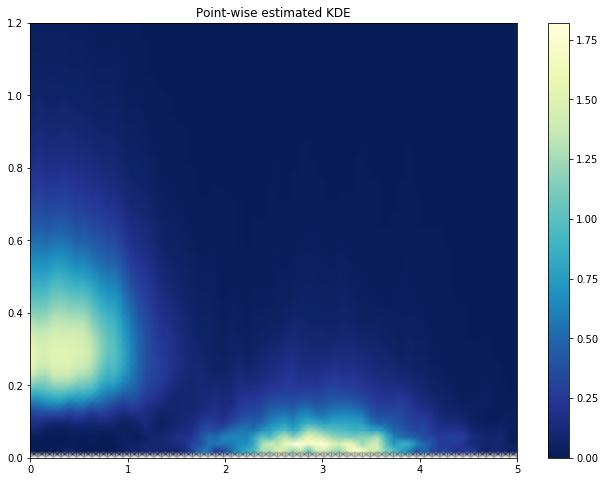

In [20]:
fig = plt.figure(figsize=(24, 8))
m3 = xs3.full('C')
ax = fig.add_subplot(1,2,1)
m = ax.pcolormesh(m3[0], m3[1], ys3, cmap=plt.cm.YlGnBu_r, shading='gouraud')
ax.set_xlim(*bounds[0])
ax.set_ylim(*bounds[1])
ax.set_title('Point-wise estimated KDE')
plt.colorbar(ax=ax, mappable=m)